# **Machine Learning Fundamentals**

# **Clustering - Final Project ** 
*** Gemal Hisuin **


## **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')

# load dataset
dataframe = pd.read_csv('/content/drive/My Drive/UJM/Machine Learning/Final project/allUsers.lcl.csv', nrows=12000)
dataframe.head()





Mounted at /content/drive


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


Remove columns that in most cases have empty vlaues.

In [ ]:
#df1 = dataframe.drop(columns =['Class','User','X2','Y2','Z2','X3','Y3','Z3','X4','Y4','Z4','X5','Y5','Z5','X6','Y6','Z6',	'X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10', 'Y10','Z10','X11','Y11','Z11'])
df1 = dataframe.drop(columns =['X8','Y8','Z8','X9','Y9','Z9','X10', 'Y10','Z10','X11','Y11','Z11'])
df1.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?


Remove the first row which contains only value of '0', and remove the 'User' and 'Class' columns.

In [ ]:
df1 = df1.iloc[1:,2:]
df1.head()


,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?
2,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?
3,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?
4,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?
5,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,?,?,?,?,?,?,?,?,?


Convert '?' into numeric values and replace them with the mean.

In [ ]:
for val in list(df1.columns.values):
    df1[val] = pd.to_numeric(df1[val], errors='coerce')
df1=df1.fillna(df1.mean())
df1.head()

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.232264,67.749220,-73.684130,59.188576,10.678936,-71.297781,37.183494,95.803951,-30.575137,37.670666,99.972226,-25.356623,44.64081,102.408832,-16.229662
2,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.450873,68.400808,-70.703991,61.587452,11.779919,-68.827418,37.183494,95.803951,-30.575137,37.670666,99.972226,-25.356623,44.64081,102.408832,-16.229662
3,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.835388,68.907925,-71.138344,61.686427,11.793440,-68.889316,37.183494,95.803951,-30.575137,37.670666,99.972226,-25.356623,44.64081,102.408832,-16.229662
4,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.596157,11.250648,-68.956425,77.387225,42.717833,-72.015146,37.183494,95.803951,-30.575137,37.670666,99.972226,-25.356623,44.64081,102.408832,-16.229662
5,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.368748,67.901260,-72.444650,61.275402,10.841109,-69.279906,37.183494,95.803951,-30.575137,37.670666,99.972226,-25.356623,44.64081,102.408832,-16.229662


Even though the dataset says there are five classes and 14 users, but using sum of squares of distances of datapoints (WCSS) I'll use the "elbow tool" to figure out how many clusters are required.

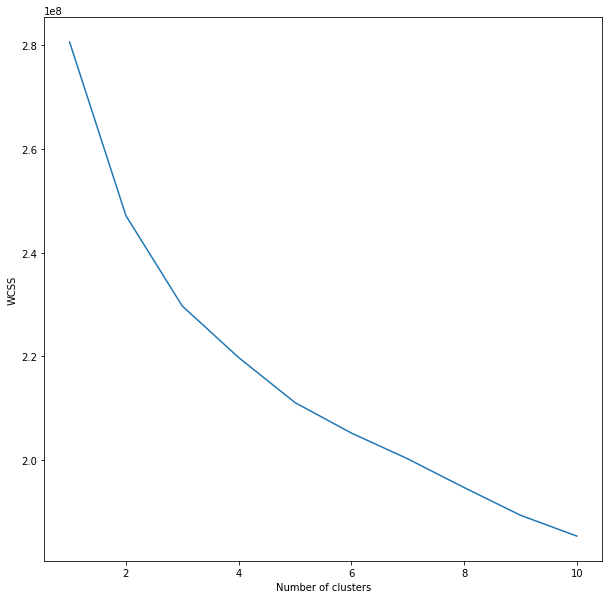

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(df1)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Since the WCSS results show that this dataset has no special elbow, I'll use 2, 5, 8, and 14 clusters in this report. [I'm using 5 and 14 because on the dataset we have 5 classes and 14 users and I want to check whcih one gives good clustering] 

In [ ]:
pca = PCA(2)
data = pca.fit_transform(df1)

When calling PCA() functions, we can assign any number of dimensions/features to reduce to, but I've gone with three for convenience. If there are more than two components, we will train and visualize the dataset using the first two components with the largest variance value.
I've used the fit transform() function to both fit and reduce the dimensionality of the dataset x. This returns a two-dimensional ndarray.
The variance of the components is then plotted and tested.

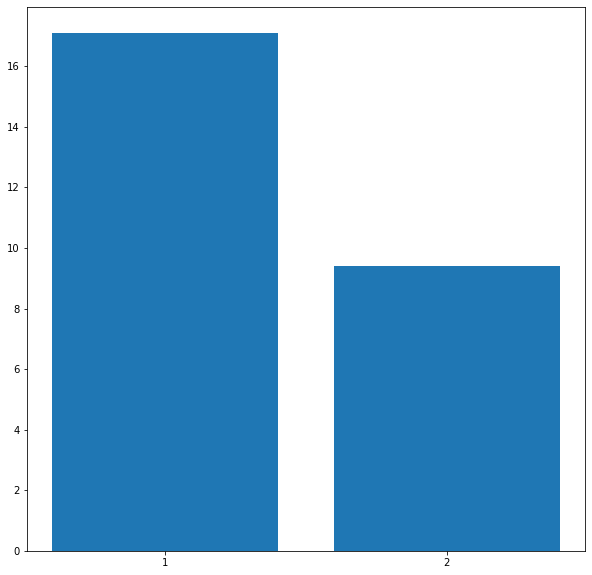

In [ ]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

The model will now be trained using the new features generated by PCA (). We'll get a 2D figure of n clusters.

## **K-means Clustering**

*With 2 number of clusters*



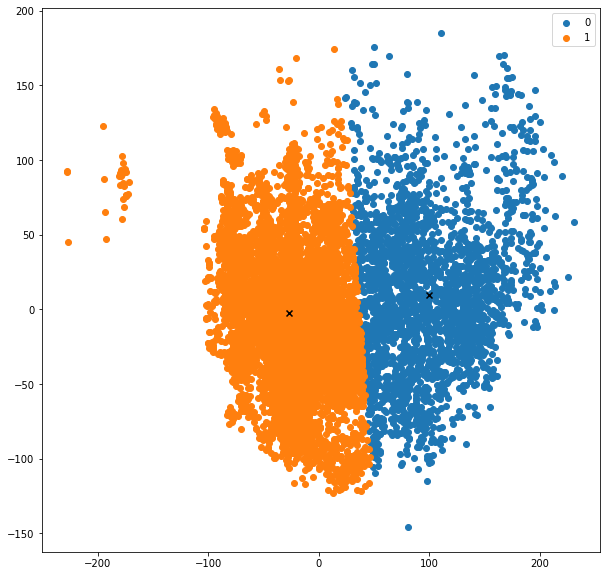

K-means clustering Silhouette Coefficient: 0.479
K-means clustering Calinski Harabasz Score: 9367.655


In [ ]:
from sklearn.cluster import KMeans
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("K-means clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("K-means clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 5 number of clusters*

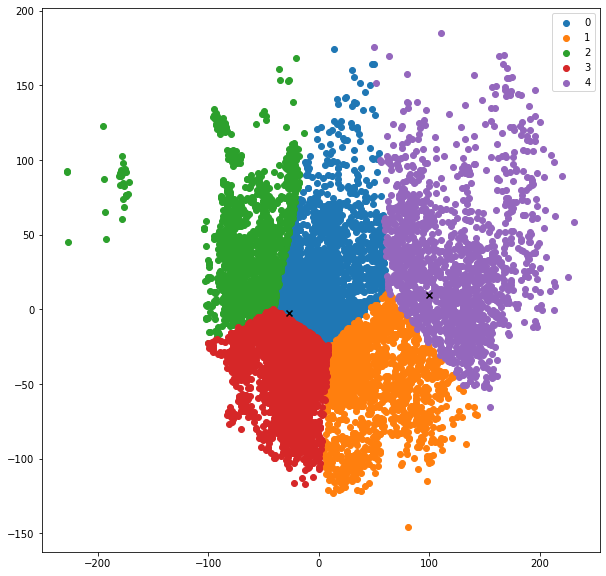

K-means clustering Silhouette Coefficient: 0.365
K-means clustering Calinski Harabasz Score: 9213.586


In [ ]:
from sklearn.cluster import KMeans
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 5, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("K-means clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("K-means clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 8 number of clusters*

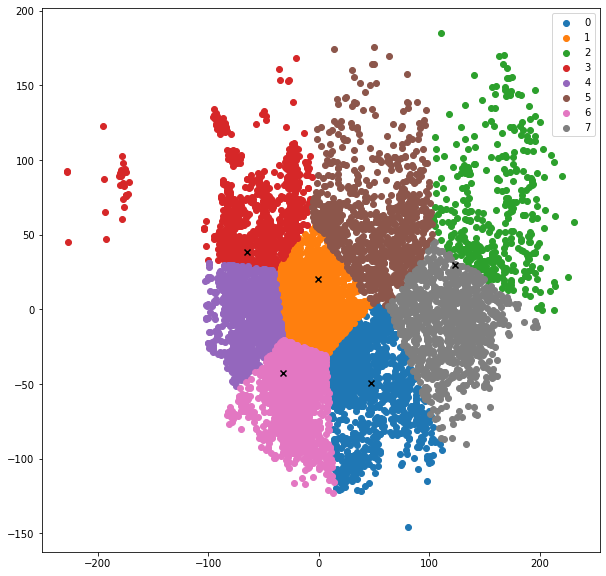

K-means clustering Silhouette Coefficient: 0.374
K-means clustering Calinski Harabasz Score: 9176.873


In [ ]:
from sklearn.cluster import KMeans
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 8, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("K-means clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("K-means clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 14 number of clusters*

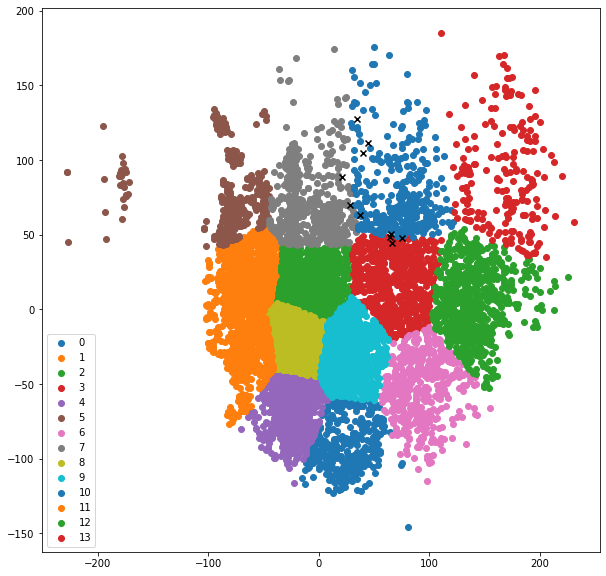

K-means clustering Silhouette Coefficient: 0.374
K-means clustering Calinski Harabasz Score: 9279.456


In [ ]:
from sklearn.cluster import KMeans
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 14, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("K-means clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("K-means clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

## **Affinity Propagation**

*with 0.77 damping*

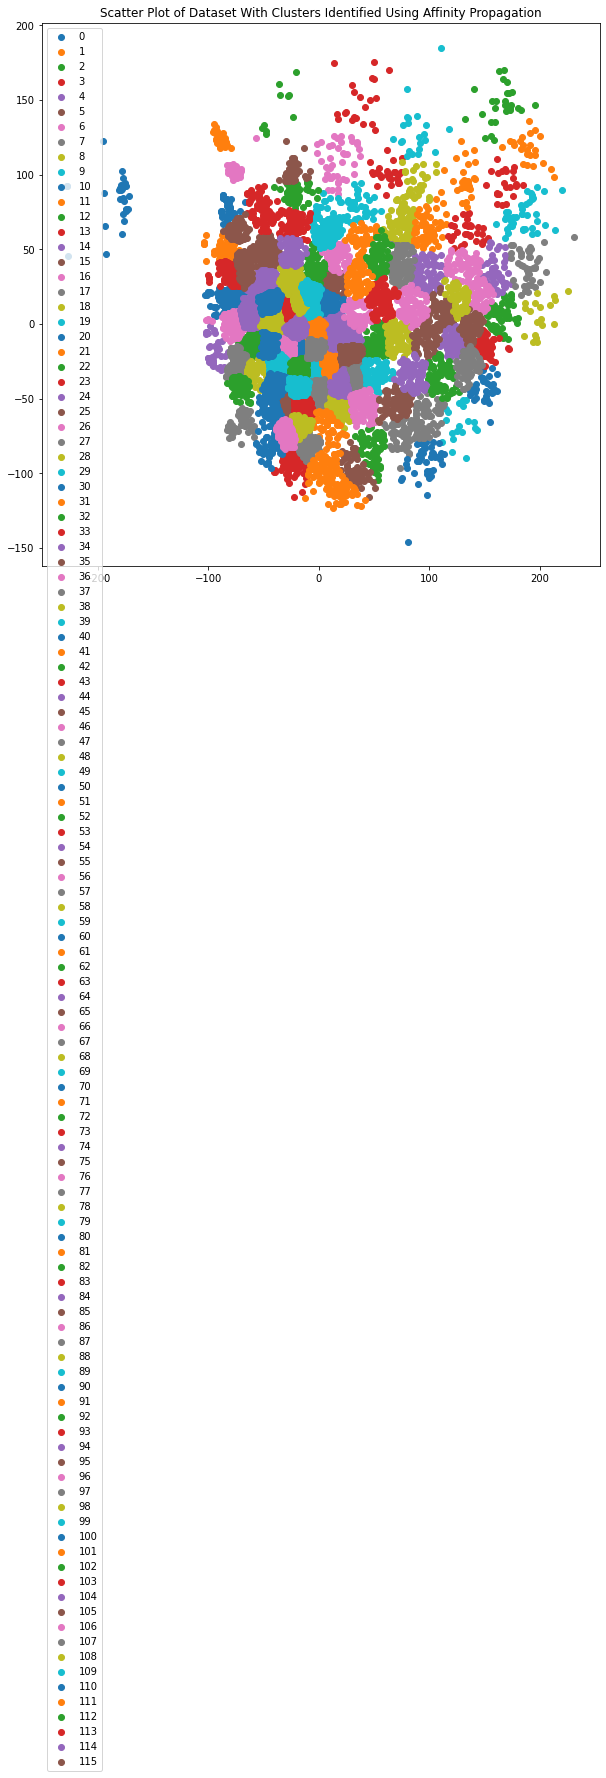

Affinity Propagation Silhouette Coefficient: 0.352
Affinity Propagation Calinski Harabasz Score: 10273.766


In [ ]:
from sklearn.cluster import AffinityPropagation
# define the model
model = AffinityPropagation(damping=0.770)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Affinity Propagation")
plt.legend()
plt.show()
print("Affinity Propagation Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Affinity Propagation Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*with 0.85 damping*

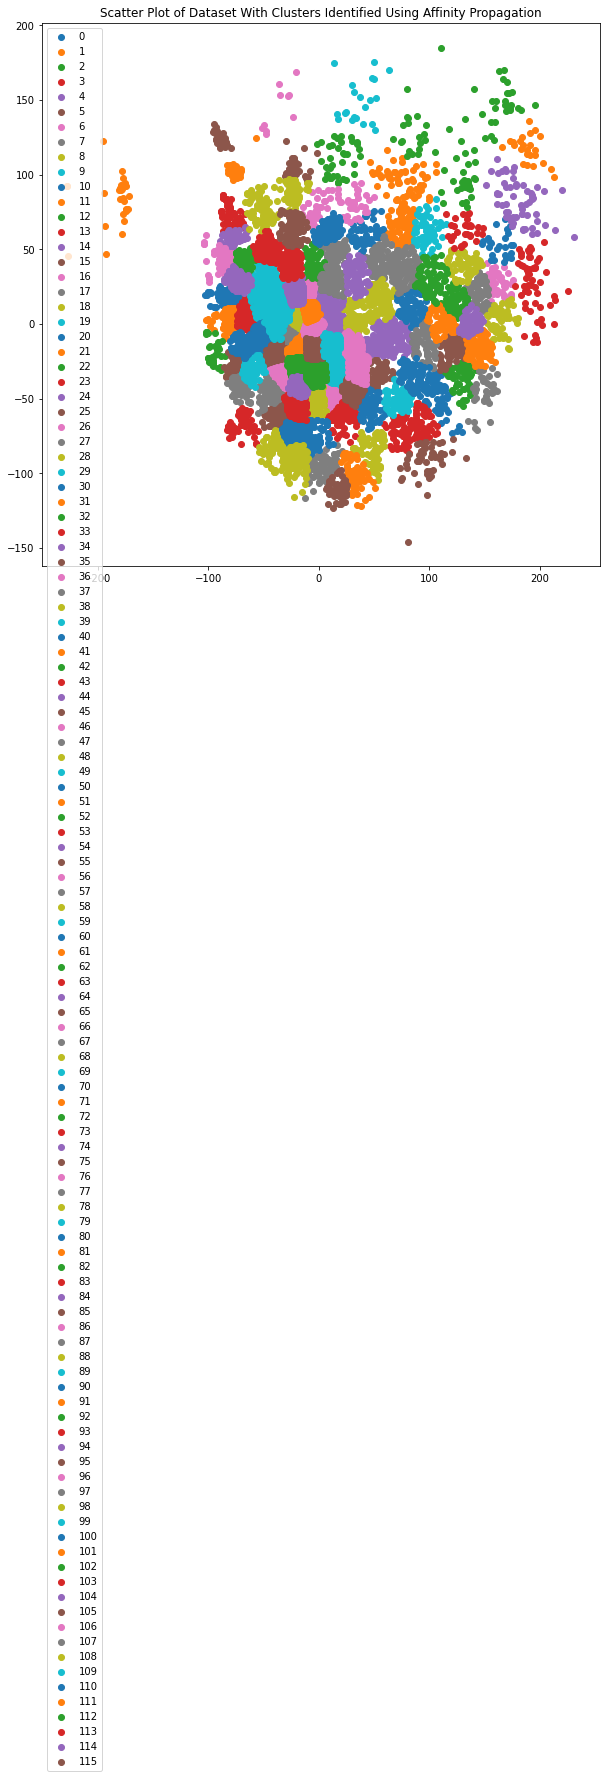

Affinity Propagation Silhouette Coefficient: 0.356
Affinity Propagation Calinski Harabasz Score: 10411.334


In [ ]:
from sklearn.cluster import AffinityPropagation
# define the model
model = AffinityPropagation(damping=0.850)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Affinity Propagation")
plt.legend()
plt.show()
print("Affinity Propagation Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Affinity Propagation Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*with 0.95 damping*

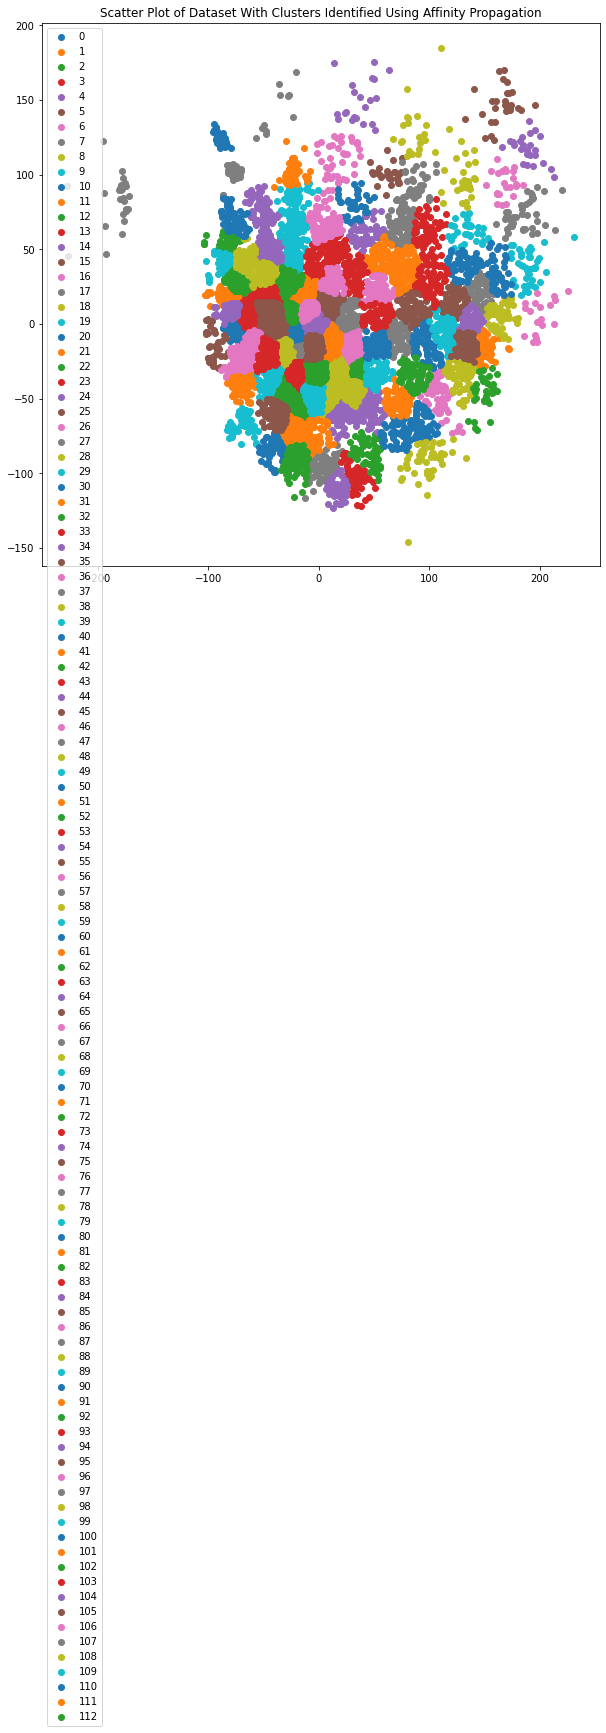

Affinity Propagation Silhouette Coefficient: 0.352
Affinity Propagation Calinski Harabasz Score: 10396.616


In [ ]:
from sklearn.cluster import AffinityPropagation
# define the model
model = AffinityPropagation(damping=0.950)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Affinity Propagation")
plt.legend()
plt.show()
print("Affinity Propagation Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Affinity Propagation Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

## **Agglomerative Clustering**

*With 2 number of clusters*

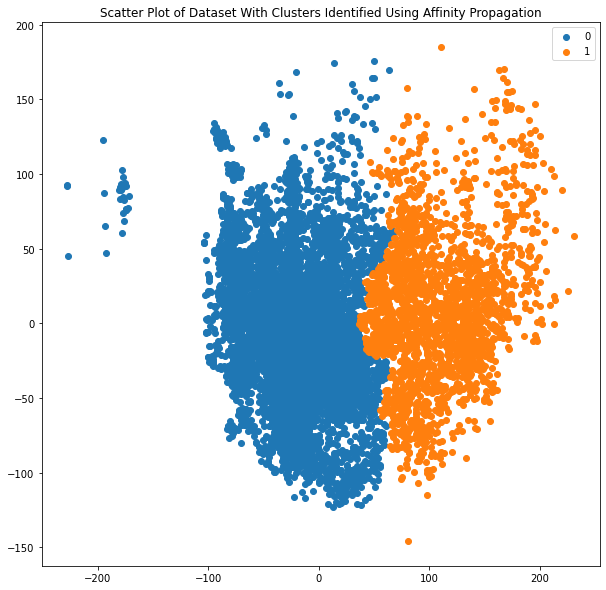

Agglomerative Clustering Silhouette Coefficient: 0.489
Agglomerative Clustering Calinski Harabasz Score: 8993.181


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Affinity Propagation")
plt.legend()
plt.show()
print("Agglomerative Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Agglomerative Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


*With 5 number of cluster*

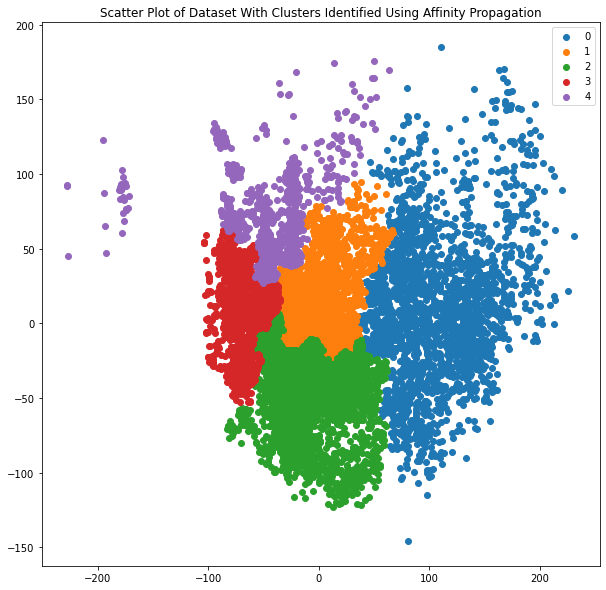

Agglomerative Clustering Silhouette Coefficient: 0.335
Agglomerative Clustering Calinski Harabasz Score: 7794.255


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Affinity Propagation")
plt.legend()
plt.show()
print("Agglomerative Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Agglomerative Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


*With 8 number of clusters*

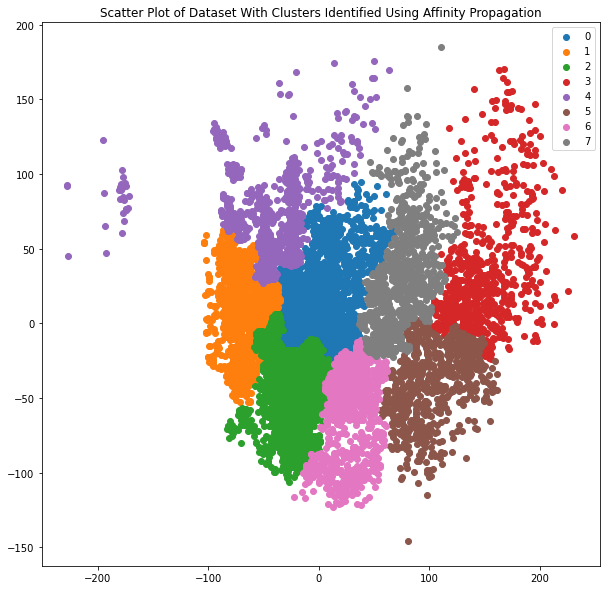

Agglomerative Clustering Silhouette Coefficient: 0.321
Agglomerative Clustering Calinski Harabasz Score: 7567.883


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=8)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Affinity Propagation")
plt.legend()
plt.show()
print("Agglomerative Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Agglomerative Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


*With 14 number of clusters*

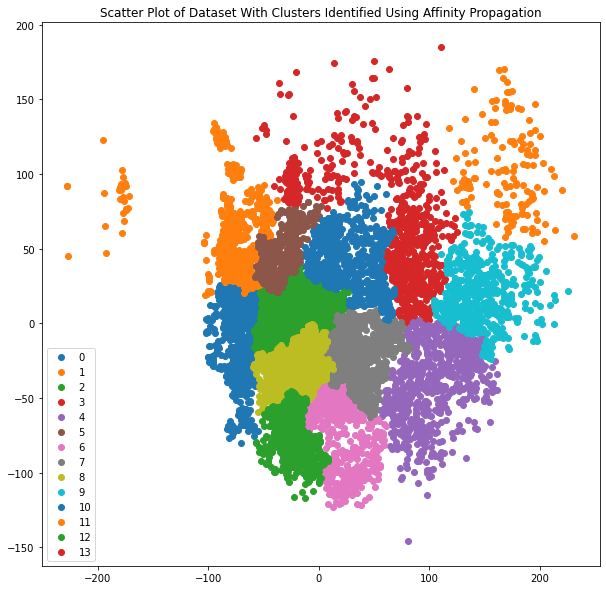

Agglomerative Clustering Silhouette Coefficient: 0.318
Agglomerative Clustering Calinski Harabasz Score: 7677.044


In [ ]:
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=14)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Affinity Propagation")
plt.legend()
plt.show()
print("Agglomerative Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Agglomerative Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


## **Birch Clustering**


*With 2 number of clusters*

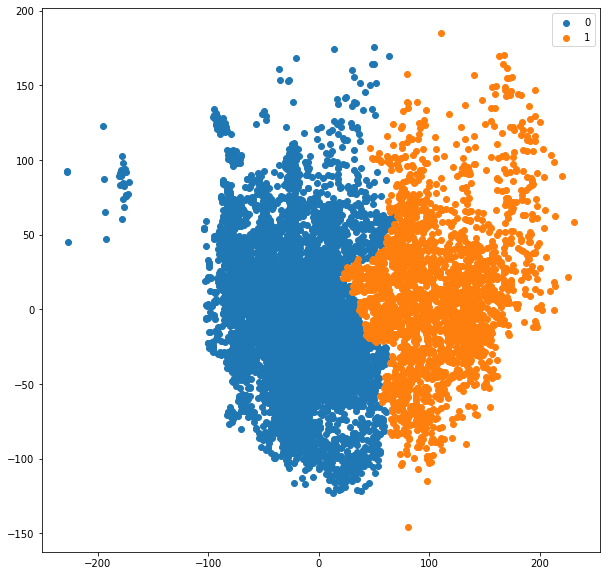

Birch Clustering Silhouette Coefficient: 0.483
Birch Clustering Calinski Harabasz Score: 8951.160


In [ ]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Birch Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Birch Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


*with 5 number of clusters*

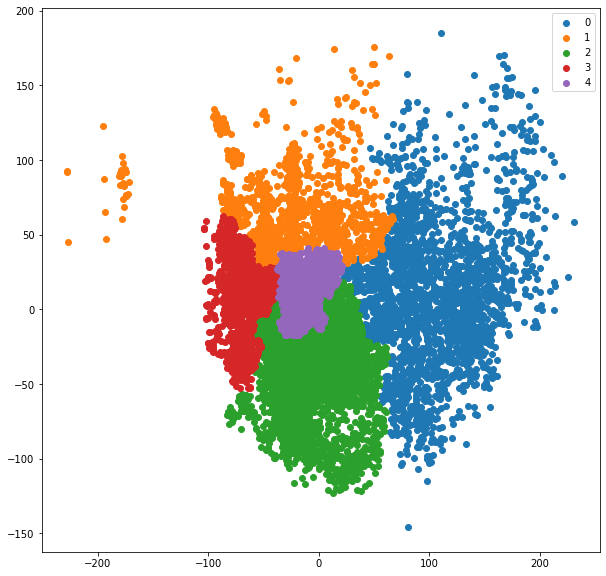

Birch Clustering Silhouette Coefficient: 0.291
Birch Clustering Calinski Harabasz Score: 7265.094


In [ ]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=5)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Birch Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Birch Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


*with 8 number of clusters*

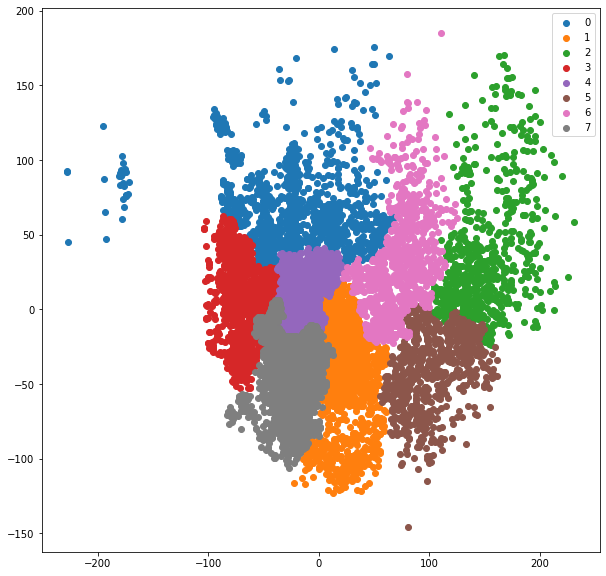

Birch Clustering Silhouette Coefficient: 0.300
Birch Clustering Calinski Harabasz Score: 7086.419


In [ ]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=8)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Birch Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Birch Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


*with 14 number of clusters*

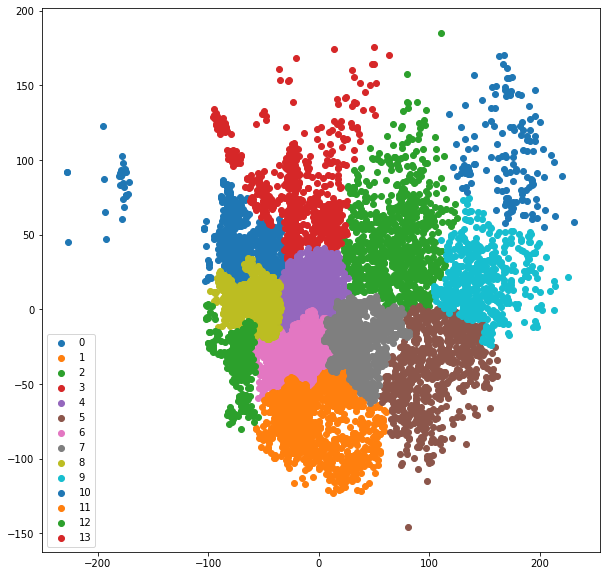

Birch Clustering Silhouette Coefficient: 0.332
Birch Clustering Calinski Harabasz Score: 8025.104


In [ ]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=14)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Birch Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Birch Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))


## **Density-based spatial clustering (DBSCAN)**

*With 'eps' 70 and 'minimum samples' of 50*

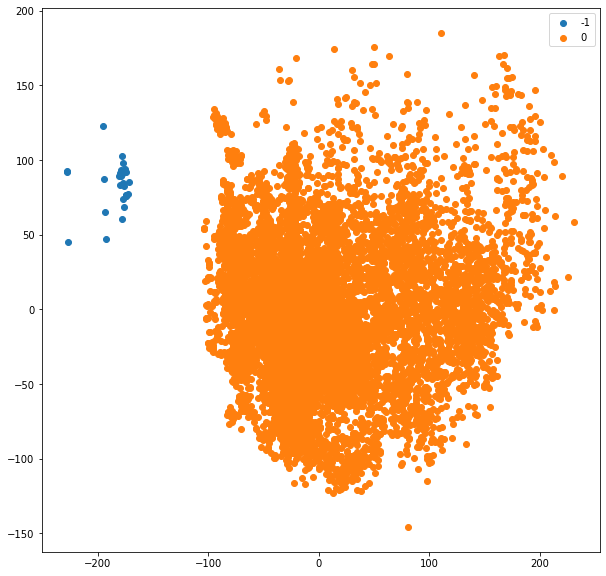

DBSCAN Clustering Silhouette Coefficient: 0.517
DBSCAN Clustering Calinski Harabasz Score: 187.756


In [ ]:
from sklearn.cluster import DBSCAN
# define the model
model = DBSCAN(eps=70, min_samples=50)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("DBSCAN Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("DBSCAN Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 'eps' 20 and 'minimum samples' of 30*

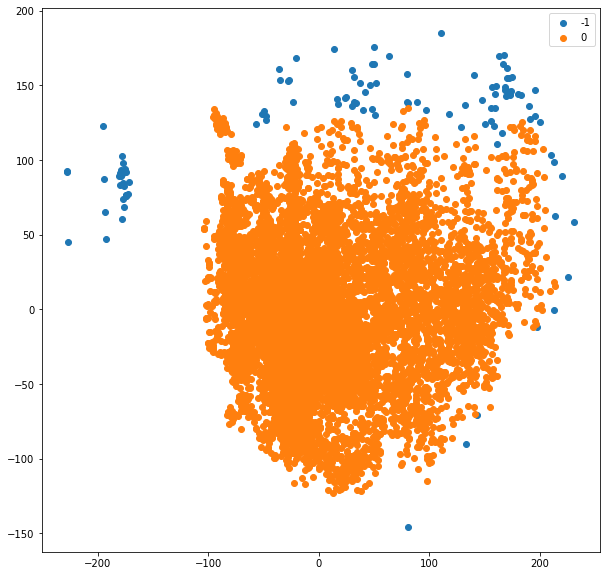

DBSCAN Clustering Silhouette Coefficient: 0.523
DBSCAN Clustering Calinski Harabasz Score: 285.958


In [ ]:
from sklearn.cluster import DBSCAN
# define the model
model = DBSCAN(eps=20, min_samples=30)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("DBSCAN Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("DBSCAN Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 'eps' 40 and 'minimum samples' of 26*

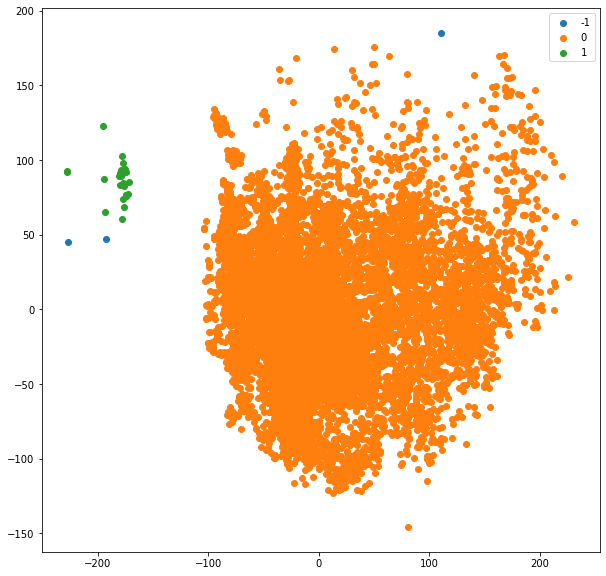

DBSCAN Clustering Silhouette Coefficient: 0.504
DBSCAN Clustering Calinski Harabasz Score: 91.335


In [ ]:
from sklearn.cluster import DBSCAN
# define the model
model = DBSCAN(eps=40, min_samples=26)
# fit model and predict clusters
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("DBSCAN Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("DBSCAN Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

## **Mini Batch KMeans Clustering**

*With 2 number of clusters*

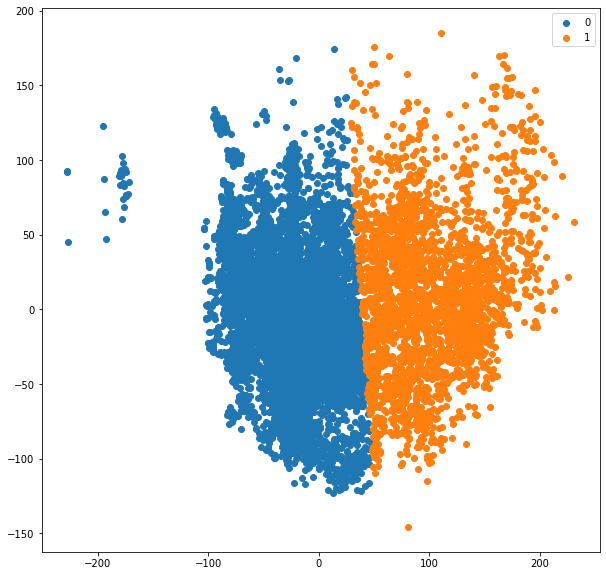

Mini Batch KMeans Clustering Silhouette Coefficient: 0.482
Mini Batch KMeans Clustering Calinski Harabasz Score: 9364.524


In [ ]:
from sklearn.cluster import MiniBatchKMeans
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Mini Batch KMeans Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Mini Batch KMeans Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 5 number of clusters*

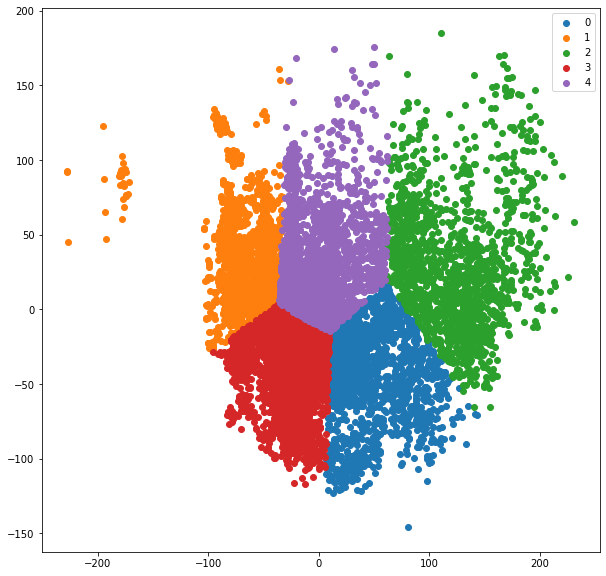

Mini Batch KMeans Clustering Silhouette Coefficient: 0.363
Mini Batch KMeans Clustering Calinski Harabasz Score: 9188.357


In [ ]:
from sklearn.cluster import MiniBatchKMeans
# define the model
model = MiniBatchKMeans(n_clusters=5)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Mini Batch KMeans Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Mini Batch KMeans Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 8 number of clusters*

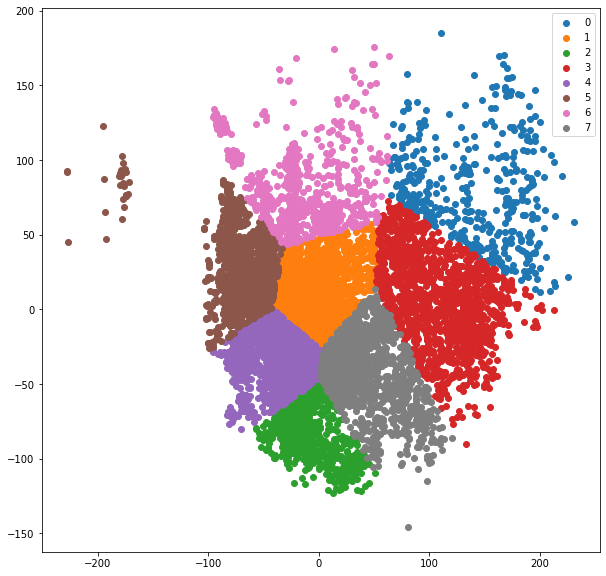

Mini Batch KMeans Clustering Silhouette Coefficient: 0.348
Mini Batch KMeans Clustering Calinski Harabasz Score: 8275.976


In [ ]:
from sklearn.cluster import MiniBatchKMeans
# define the model
model = MiniBatchKMeans(n_clusters=8)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Mini Batch KMeans Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Mini Batch KMeans Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 14 number of clusters*

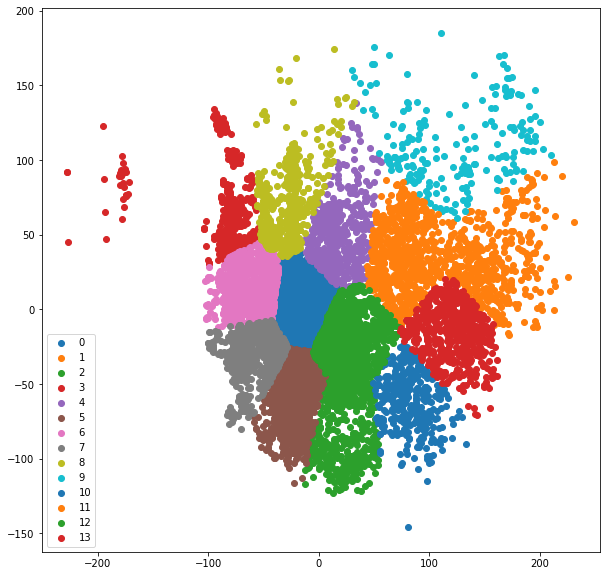

Mini Batch KMeans Clustering Silhouette Coefficient: 0.358
Mini Batch KMeans Clustering Calinski Harabasz Score: 8548.642


In [ ]:
from sklearn.cluster import MiniBatchKMeans
# define the model
model = MiniBatchKMeans(n_clusters=14)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()
print("Mini Batch KMeans Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Mini Batch KMeans Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

## **Gaussian Mixture Model**

*With 2 number of clusters*

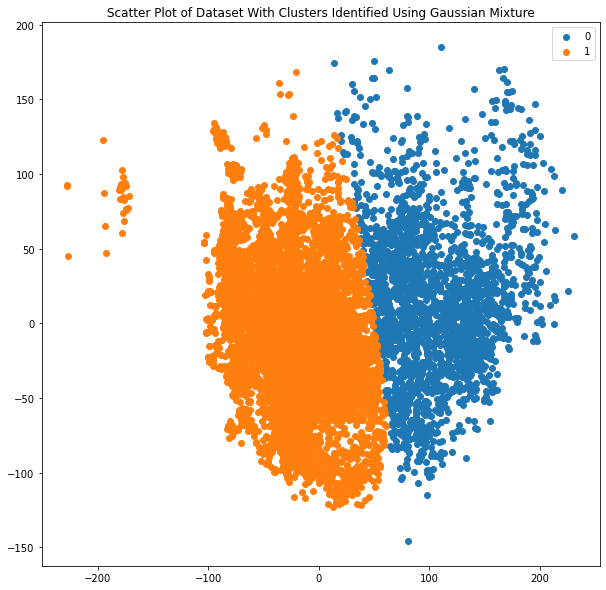

Gaussian Mixture Clustering Silhouette Coefficient: 0.493
Gaussian Mixture Clustering Calinski Harabasz Score: 9206.540


In [ ]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=2)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Gaussian Mixture")
plt.legend()
plt.show()
print("Gaussian Mixture Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Gaussian Mixture Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 5 number of clusters*

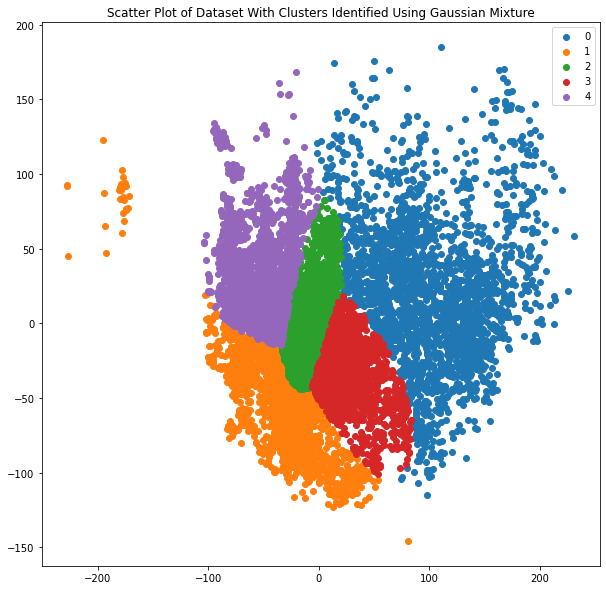

Gaussian Mixture Clustering Silhouette Coefficient: 0.290
Gaussian Mixture Clustering Calinski Harabasz Score: 6911.428


In [ ]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=5)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Gaussian Mixture")
plt.legend()
plt.show()
print("Gaussian Mixture Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Gaussian Mixture Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

*With 8 number of clusters*

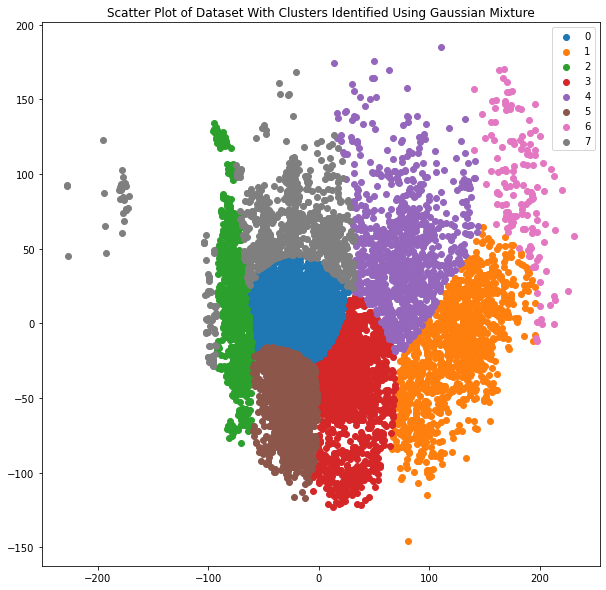

Gaussian Mixture Clustering Silhouette Coefficient: 0.318
Gaussian Mixture Clustering Calinski Harabasz Score: 6595.765


In [ ]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=8)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Gaussian Mixture")
plt.legend()
plt.show()
print("Gaussian Mixture Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Gaussian Mixture Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

With 14 number of clusters

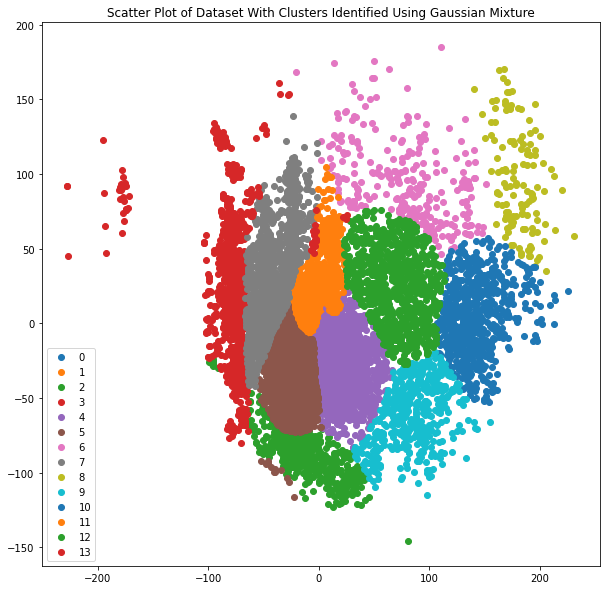

Gaussian Mixture Clustering Silhouette Coefficient: 0.247
Gaussian Mixture Clustering Calinski Harabasz Score: 5053.554


In [ ]:
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=14)
# fit the model
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.title("Scatter Plot of Dataset With Clusters Identified Using Gaussian Mixture")
plt.legend()
plt.show()
print("Gaussian Mixture Clustering Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, label, metric = 'euclidean'))
print("Gaussian Mixture Clustering Calinski Harabasz Score: %0.3f" % metrics.calinski_harabasz_score(data, label))

# **Supervised Learning**

*Neural Network classifier that takes X0, Y0, Z0, …, X11, Y11, Z11 as input attributes and returns the Class as the output.*

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split


from google.colab import drive
drive.mount('/content/drive')

# load dataset
dataframe = pd.read_csv('/content/drive/My Drive/UJM/Machine Learning/Final project/allUsers.lcl.csv')


for val in list(dataframe.columns.values):
    dataframe[val] = pd.to_numeric(dataframe[val], errors='coerce')

    
dataframe=dataframe.fillna(dataframe.mean())


listValuesToNormalize=list(dataframe.columns.values)
listValuesToNormalize.remove('Class')
listValuesToNormalize.remove('User')
listValuesToNormalize
dataframe[listValuesToNormalize] = minmax_scale(dataframe[listValuesToNormalize])

# get dataset (split it in input/output)
dataset = dataframe.values

X = dataset[:,2:].astype(float)
Y = dataset[:,0].astype(int)

# convert integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

#split 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.2, random_state=1)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# create model
model = Sequential()
model.add(Dense(16, input_dim=36, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.7371698374615214))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, batch_size=40)

#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
1172/1172 [==============================] - 3s 3ms/step - loss: 0.4118 - accuracy: 0.3435 - val_loss: 0.3216 - val_accuracy: 0.5388
Epoch 2/50
1172/1172 [==============================] - 3s 3ms/step - loss: 0.2981 - accuracy: 0.5980 - val_loss: 0.2587 - val_accuracy: 0.6450
Epoch 3/50
1172/1172 [==============================] - 3s 3ms/step - loss: 0.2470 - accuracy: 0.6769 - val_loss: 0.2176 - val_accuracy: 0.7280
Epoch 4/50
1172/1172 [==============================] - 3s 2ms/step - loss: 0.2151 - accuracy: 0.7301 - val_loss: 0.1932 - val_accuracy: 0.7635
Epoch 5/50
1172/1172 [==============================] - 3s 2ms/step - loss: 0.1919 - accuracy: 0.7644 - val_loss: 0.1790 - val_accuracy: 0.7810
Epoch 6/50
1172/1172 [==============================] - 3s 2ms/step - loss: 0.1774 - accuracy: 0.7851 - val_loss: 0.1635 - val_accuracy: 0.8043
Epoch 7

*NN-classifier that takes as inputs attributes `X0, Y0, Z0, …, X11, Y11, Z11` AND the User information, and returns the Class as the output.*

In [ ]:
# load dataset
dataframe = pd.read_csv('/content/drive/My Drive/UJM/Machine Learning/Final project/allUsers.lcl.csv')

for val in list(dataframe.columns.values):
    dataframe[val] = pd.to_numeric(dataframe[val], errors='coerce')
    
dataframe=dataframe.fillna(dataframe.mean())

hot_encoded_user = np_utils.to_categorical(dataframe['User'], dtype='int32')
frame_user=pd.DataFrame(hot_encoded_user)
dataframe = pd.concat([dataframe, frame_user], axis=1)

listValuesToNormalize=list(dataframe.columns.values)
listValuesToNormalize.remove('Class')
listValuesToNormalize.remove('User')
listValuesToNormalize
dataframe[listValuesToNormalize] = minmax_scale(dataframe[listValuesToNormalize])

# get dataset (split it in input/output)
dataset = dataframe.values

X = dataset[:,2:].astype(float)
Y = dataset[:,0].astype(int)

# convert integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

#split 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.2, random_state=7)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print("the dataset has "+str(X.shape[0])+ "samples that are splitted in:")
print("- "+str(X_train.shape[0])+"samples (training set)" )
print("- "+str(X_val.shape[0])+"samples (validation set)")
print("- "+str(X_test.shape[0])+"samples (test set)")

# create model
model = Sequential()
model.add(Dense(16, input_dim=51, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.7371698374615214))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=80, batch_size=40)

#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

the dataset has 78096samples that are splitted in:
- 46857samples (training set)
- 15619samples (validation set)
- 15620samples (test set)
Epoch 1/80
1172/1172 [==============================] - 4s 3ms/step - loss: 0.4119 - accuracy: 0.3574 - val_loss: 0.2369 - val_accuracy: 0.7205
Epoch 2/80
1172/1172 [==============================] - 3s 3ms/step - loss: 0.2194 - accuracy: 0.7353 - val_loss: 0.1728 - val_accuracy: 0.7847
Epoch 3/80
1172/1172 [==============================] - 3s 3ms/step - loss: 0.1641 - accuracy: 0.8001 - val_loss: 0.1310 - val_accuracy: 0.8563
Epoch 4/80
1172/1172 [==============================] - 3s 2ms/step - loss: 0.1254 - accuracy: 0.8623 - val_loss: 0.1028 - val_accuracy: 0.8977
Epoch 5/80
1172/1172 [==============================] - 3s 2ms/step - loss: 0.1029 - accuracy: 0.8958 - val_loss: 0.0873 - val_accuracy: 0.9134
Epoch 6/80
1172/1172 [==============================] - 3s 3ms/step - loss: 0.0869 - accuracy: 0.9134 - val_loss: 0.0759 - val_accuracy: 0.92

*Neural Network Classifier ONLY for Class 0. The classifier takes as inputs attributes X0, Y0, Z0, …, X11, Y11, Z11, and returns the User ID as the output.*

In [ ]:
from keras.layers import Dropout
# load dataset
dataframe = pd.read_csv('/content/drive/My Drive/UJM/Machine Learning/Final project/allUsers.lcl.csv')

for val in list(dataframe.columns.values):
    dataframe[val] = pd.to_numeric(dataframe[val], errors='coerce')

#fill missing data
dataframe=dataframe.fillna(dataframe.mean())

#keep only first class
dataframe=dataframe.loc[dataframe['Class'] == 1]

dataframe=dataframe.drop(['Class'], axis=1)


#normalize data
listValuesToNormalize=list(dataframe.columns.values)
listValuesToNormalize.remove('User')
listValuesToNormalize
dataframe[listValuesToNormalize] = minmax_scale(dataframe[listValuesToNormalize])

# get dataset (split it in input/output)
dataset = dataframe.values

X = dataset[:,1:].astype(float)
Y = dataset[:,0].astype(int)

# convert integers to  one hot encoded
hot_encoded_y = np_utils.to_categorical(Y)

#split 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, hot_encoded_y, test_size=0.2, random_state=5)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)

# create model
model = Sequential()
model.add(Dense(32, input_dim=36, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=70, batch_size=20)

#test model
loss, acc =  model.evaluate(X_test, y_test, verbose=0)
print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

Epoch 1/70
488/488 [==============================] - 2s 3ms/step - loss: 0.3747 - accuracy: 0.0939 - val_loss: 0.2212 - val_accuracy: 0.1632
Epoch 2/70
488/488 [==============================] - 1s 2ms/step - loss: 0.2285 - accuracy: 0.1802 - val_loss: 0.1966 - val_accuracy: 0.4928
Epoch 3/70
488/488 [==============================] - 1s 3ms/step - loss: 0.2021 - accuracy: 0.3131 - val_loss: 0.1772 - val_accuracy: 0.5146
Epoch 4/70
488/488 [==============================] - 1s 2ms/step - loss: 0.1852 - accuracy: 0.3928 - val_loss: 0.1626 - val_accuracy: 0.5435
Epoch 5/70
488/488 [==============================] - 1s 2ms/step - loss: 0.1734 - accuracy: 0.4461 - val_loss: 0.1522 - val_accuracy: 0.5644
Epoch 6/70
488/488 [==============================] - 1s 2ms/step - loss: 0.1629 - accuracy: 0.4758 - val_loss: 0.1407 - val_accuracy: 0.5709
Epoch 7/70
488/488 [==============================] - 1s 2ms/step - loss: 0.1550 - accuracy: 0.5062 - val_loss: 0.1319 - val_accuracy: 0.6296
Epoch 